In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
vm=pd.read_csv("Social_Network_Ads.csv")
vm

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [9]:
print(vm.head())
print(vm.tail())
print(vm.info())
print(vm.describe())
print(vm.isnull().sum())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
     Age  EstimatedSalary  Purchased
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.00

<Axes: >

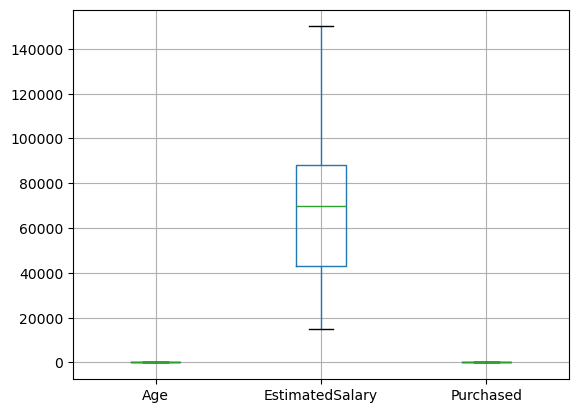

In [12]:
vm.boxplot()

In [14]:
X=vm.drop(['Purchased'],axis=1)
Y=vm['Purchased']

In [16]:
print(X)
print(Y)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [18]:
#Split the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size =0.2,random_state = 0)

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [30]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [32]:
y_pred=lr.predict(xtest)

In [34]:
print(xtrain)
print("------------\n")
print(xtest)
print("------------\n")
print(ytrain)
print("------------\n")
print(ytest)
print("------------\n")
print(y_pred)

     Age  EstimatedSalary
336   58           144000
64    59            83000
55    24            55000
106   26            35000
300   58            38000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[320 rows x 2 columns]
------------

     Age  EstimatedSalary
132   30            87000
309   38            50000
341   35            75000
196   30            79000
246   35            50000
..   ...              ...
14    18            82000
363   42            79000
304   40            60000
361   53            34000
329   47           107000

[80 rows x 2 columns]
------------

336    1
64     0
55     0
106    0
300    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 320, dtype: int64
------------

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64
----

In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score

In [44]:
cm=confusion_matrix(ytest,y_pred)
cm

array([[56,  2],
       [ 5, 17]], dtype=int64)

In [46]:
ac=accuracy_score(ytest,y_pred)
ac

0.9125

In [50]:
tn,fp,fn,tp=confusion_matrix(ytest,y_pred).ravel()
print(tn)
print(tp)
print(fn)
print(fp)


56
17
5
2


In [52]:
err_rate=1-ac
print(err_rate)

0.08750000000000002


In [54]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



In [56]:
print(precision_score(ytest,y_pred))
print(recall_score(ytest,y_pred))
print(f1_score(ytest,y_pred))

0.8947368421052632
0.7727272727272727
0.8292682926829268
